<a href="https://colab.research.google.com/github/napolitanodst/Apprenticeship-log/blob/Apprenticeship-Code/Geo_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Packages
import tensorflow as tf
from tensorflow import keras
import os
import zipfile
import pandas as pd
import splitfolders

In [3]:
# Importing delle immagini del dataset
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/dataset.zip', 'r') 
zip_ref.extractall('/tmp') 
zip_ref.close()

In [4]:
# Ridimensionamento delle immagini
import PIL
from PIL import Image
i = r'/tmp/dataset/Sedimentarie'
for file in os.listdir(i):
    i_img = i+"/"+file
    img = Image.open(i_img)
    img = img.resize((384,306))
    img.save(i_img)
q = r'/tmp/dataset/Metamorfiche'
for file in os.listdir(q):
    q_img = q+"/"+file
    img = Image.open(q_img)
    img = img.resize((384,306))
    img.save(q_img)
k = r'/tmp/dataset/Vulcaniche'
for file in os.listdir(k):
    k_img = k+"/"+file
    img = Image.open(k_img)
    img = img.resize((384,306))
    img.save(k_img)


In [7]:
# Splitting in train, validation set
input = '/tmp/dataset'
output = '/tmp/prova'

splitfolders.ratio(input, output=output, seed=1337,ratio=(.7,.3), group_prefix=None)

Copying files: 210 files [00:00, 6037.41 files/s]


In [8]:
# Creazione Datasets
cartella = "/tmp/prova/train"
train= tf.keras.utils.image_dataset_from_directory(
             cartella,
             image_size= (384,306)                              
)

cartella2 = "tmp/prova/test"
test= tf.keras.utils.image_dataset_from_directory(
             cartella,
             image_size= (384,306)                              
)

cartella3 = "tmp/prova/val"
val= tf.keras.utils.image_dataset_from_directory(
             cartella,
             image_size= (384,306)      
)      



Found 146 files belonging to 3 classes.
Found 146 files belonging to 3 classes.
Found 146 files belonging to 3 classes.


In [9]:
# Modello (LeNet5 like)
model = tf.keras.models.Sequential(
    [
    tf.keras.layers.Conv2D(6, 5, activation="relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(16, 5, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(len(train.class_names), activation="softmax")
    ]
)

In [10]:
training=model.compile(
             optimizer=tf.keras.optimizers.Adam(),
             loss=tf.keras.losses.SparseCategoricalCrossentropy(),
             metrics=["accuracy"]
)

In [11]:
#Callback che stoppa il training ad accuracy al 95%
class Stop(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):

    if(logs.get('accuracy') > 0.95):

      self.model.stop_training = True

In [14]:
#Fitting
stop = Stop()
history = model.fit(
                    train,
                    validation_data=val,
                    epochs=50,
                    callbacks= stop
)

Epoch 1/50
5/5 [==============================] - 12s 270ms/step - loss: 462.7679 - accuracy: 0.3493 - val_loss: 248.2151 - val_accuracy: 0.3630
Epoch 2/50
5/5 [==============================] - 1s 164ms/step - loss: 255.8802 - accuracy: 0.3767 - val_loss: 77.1691 - val_accuracy: 0.6096
Epoch 3/50
5/5 [==============================] - 1s 238ms/step - loss: 53.1120 - accuracy: 0.6370 - val_loss: 93.5833 - val_accuracy: 0.5205
Epoch 4/50
5/5 [==============================] - 2s 377ms/step - loss: 69.9771 - accuracy: 0.5959 - val_loss: 14.6557 - val_accuracy: 0.8082
Epoch 5/50
5/5 [==============================] - 1s 170ms/step - loss: 22.0357 - accuracy: 0.7260 - val_loss: 26.7909 - val_accuracy: 0.6370
Epoch 6/50
5/5 [==============================] - 1s 148ms/step - loss: 16.1017 - accuracy: 0.7603 - val_loss: 5.6685 - val_accuracy: 0.8288
Epoch 7/50
5/5 [==============================] - 1s 148ms/step - loss: 4.7747 - accuracy: 0.8288 - val_loss: 4.9856 - val_accuracy: 0.8082
Epoch

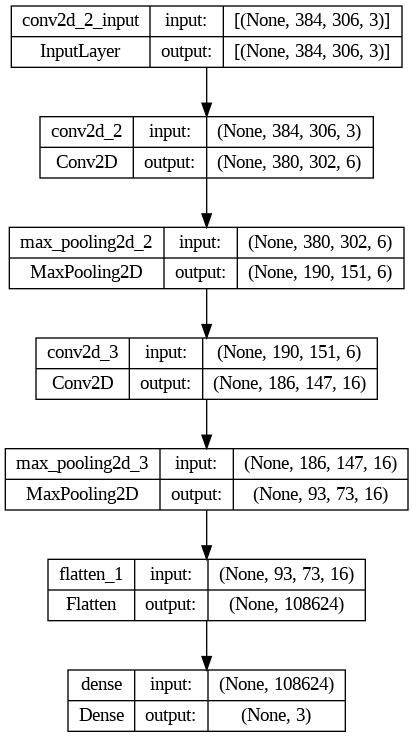

In [15]:
keras.utils.plot_model(model, show_shapes=True)

<Axes: >

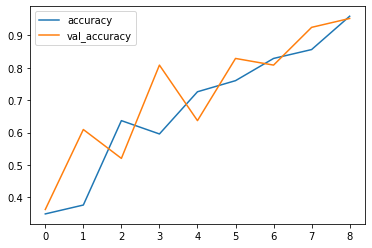

In [16]:
#Plot di accuracy e val accuracy
pd.DataFrame(history.history)[["accuracy","val_accuracy"]].plot()